# 05 Algegra with Scipy and Numpy 
## CLASS MATERIAL

<br> <a href='#FindingRootsPolynomials'>1. Finding Roots of Polynomials</a>
<br> <a href='#RootFindingInitialEstimate'>2. Root Finding using an Initial Estimate</a> 
<br> <a href='#SystemsCoupledEquations'>3. Systems of Coupled Equations</a> 
<br> <a href='#SymbolicMathematics'>4. Symbolic Mathematics</a> 
<br><a href='#ReviewExercises'>5. Review Exercises</a>



# Download the new class notes.
__Navigate to the directory where your files are stored.__

__Update the course notes by downloading the changes__

### Lesson Goal

In this class we will learn some useful techniques for making common algebraic operations faster and easier by solving them computationally. 

This can help you to:
1. Quickly solve problems 
1. Solve "messy" problems relating to experimental data
1. Check your answers to problems solved using hand calculations


### Fundamental programming concepts
 - Numpy and Scipy functions
 - Manipulating arrays to use within functions


In [57]:
import numpy as np
import random 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='FindingRootsPolynomials'></a>

## 1. Finding Roots of Polynomials


Many applications involve finding the roots of a function $f(x)$.

That is, we want to find a value or values for $x$ such that $f(x)=0$.

Finding the roots of a function is one of the most fundamental mathematical tasks in engineering.

For example, __optimization__ is one of the most important and common tasks in engineering. 

__Optimization__ : Finding the maximal or minimal value of a dependent variable with respect to some independent variable(s). 

To find the maxima and minima of some function:
- take the derivative(s) of the function with respect to the independent variable(s)
- find values of the function for which the derivative(s) are equal to zero

Last week, we studied how to fit a polynimal function through a series of data points. 

Often, we want to find the roots/zeros of a polynomial. 

For some functions, the roots are easy to find analytically:

$f(x) = 2x^3 - 8x^2 - 96x$

As each term is divisible by $2x$, we can easily factorise this function to:

$f(x)=(2x)(x + 4)(x - 8)$

The roots are 0, -4, and 8.

When working with real data, root finding is often not so straighforward. 

- noisy experimental data
- higher order polynomials 

In [58]:
# Example data 
x = np.linspace(-6, 10, 100) # 100 equally spaced points between -6 and 10

y = (2*x**3 - 8*x**2 - 96*x) # function y = 2x^3 - 8x^2 - 96x

We can use pseudo-random number generators to make the data more "messy" i.e. more like real experimental data.

This is an example of scope. 

Notice that two random number libraries are used:

- `np.random` e.g. `np.random.random` : generates rando number in range [0.0, 1.0)
- `random` e.g `random.sample` : selects a random sample from data given

In [59]:
# add noise : multiply each y value by random number
y_n = y * np.random.random(size=x.shape) 

# Choose a random sample of 50 data points
x_e, y_e = zip(*random.sample(list(zip(x, y_n)), 50))

# sort into x-ascending order 
tmp = sorted(zip(x_e, y_e))
x_e = [t[0] for t in tmp]
y_e = [t[1] for t in tmp]

In [60]:
# Fit a polynomial of order 3 to the data
coeffs = np.polyfit(x_e, y_e, 3)
yfit = np.poly1d(coeffs)(x_e)

# Round all coefficients to 3d.p.
coeffs = [round(c,3) for c in coeffs]

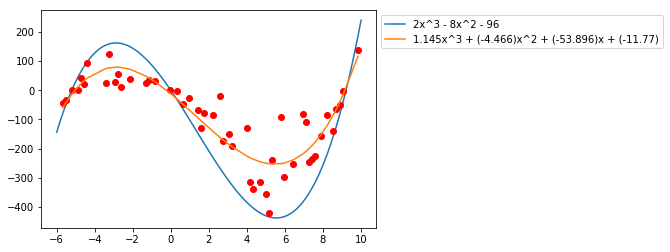

In [61]:
# Plot the data
plt.plot(x, y,  label=f'2x^3 - 8x^2 - 96')      # orignal data
plt.plot(x_e, y_e, 'ro')                        # "experimental" data
plt.plot(x_e, yfit, label=f'{coeffs[0]}x^3 + ({coeffs[1]})x^2 + ({coeffs[2]})x + ({coeffs[3]})')      # fitted data

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

We can see that the fitted polynomial does not factorise so cleanly. 

This makes it difficult to solve the equation *analytically*. 

- __Analytical solution__ : frames the problem in a well-understood form. An exact solution can be found.
- __Numerical solution__ :  iteratively guesses at the solution until the answer is good enough enough to stop.

We can solve the problem numerically, for example using the bisection method. 
<img src="img/bisection_method.png" alt="Drawing" style="width: 300px;"/>
__Biscetion method__:
For a given function F(x):
1. two values a and b are chosen for which F(a) > 0 and F(b) < 0 (or the other way around)
1. interval halving: a midpoint x=c is calculated as the arithmetic mean between a and b, c = (a + b) / 2
1. F(c) is evaluated at c
1. if F(c) = 0 the root of the function is c
1. if F(c) ≠ 0, check the sign of F(c):
    - if F(c) has the same sign as F(a), replace a with c (b stays the same)
    - if F(c) has the same sign as F(b), replace b with c (a stays the same)
1. go back to step 2.

The algorithm ends when the values of F(c) is less than a defined tolerance (e.g. 0.001). 

When we import a Python function, a computer algorithm runs this or a similar numerical solver. 

We can use the functions `roots` to find the roots of a polynomial function.

Appreciably, this is much faster than finding the roots numericlaly by hand or by writing the algorithm ourselves. 

In [62]:
r = np.roots(coeffs)
print(r)

[ 9.16105589 -5.03789022 -0.22272899]


We can plot the polynomial equation and the roots to check the solution:

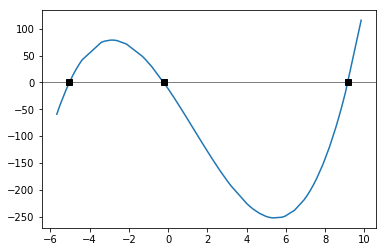

In [63]:
plt.plot(x_e, yfit)                   # fitted data
plt.axhline(0, color='black', lw=0.5) # y=0 axis

z = np.zeros(len(r))                  # array of zeros  
plt.plot(r, z, 'ks')                  # roots

For a polynomial function, we know that there will be as many roots as the order of the function.
<br>e.g. the cubic function above will have three roots.

It is easy to verify this:
1. visually from the plot above.
1. in code:

In [64]:
print(f'number of roots = {len(r)}')

number of roots = 3


Another example showing the full process:

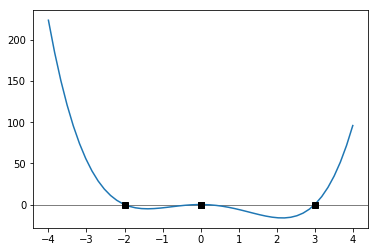

In [65]:
X = np.linspace(-4, 4)       # x data
coeffs = [1, -1, -6, 0, 0]   # coefficients of polynomial
Y = np.poly1d(coeffs)(X)     # y data
R = np.roots(coeffs)         # roots

# plot
plt.axhline(0, color='black', lw=0.5) 
plt.plot(X, Y)               # x,y data   
Z = np.zeros(len(R))                  
plt.plot(R, Z, 'ks')         # roots

<a id='RootFindingInitialEstimate'></a>
# 2. Root Finding using an Initial Estimate



`roots` ony works for polynomials.

There are other python functions available for finding the roots of other functions.

For a polynomial function, we know that there will be as many roots as the order of the function.

For other functions, the number of roots may be:

- initially unknown
- infinite
<img src="img/cos_graph.png" alt="Drawing" style="width: 300px;"/> 

The function `fsolve` finds the roots of a function, given a starting estimate.

In [66]:
from scipy.optimize import fsolve

In [67]:
# the function must be a python function
def f(t):
    return t**2 - 4

starting_guess = 3

print(fsolve(f, starting_guess))

[2.]


We can plot the data to check that there is a root at 2.

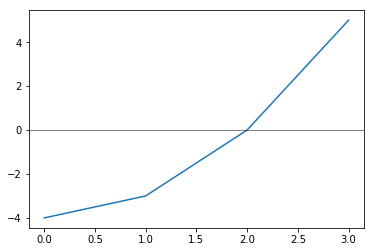

In [68]:
plt.plot(range(4), [f(r) for r in (range(4))])
plt.axhline(0, color='black', lw=0.5)

A `lambda` function can be used to make the code shorter as we do not need to create a function definition with `def`.

In [69]:
starting_guess = 3

print(fsolve(lambda t: t**2 - 4, starting_guess))

[2.]


Let's plot the experimental data from earlier. 

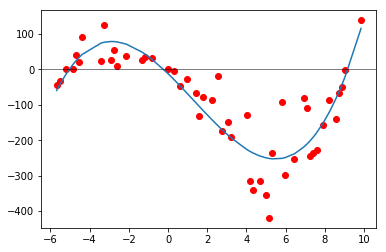

In [70]:
plt.plot( x_e, y_e, 'ro')  # "experimental" data
plt.plot( x_e, yfit )      # fitted data
plt.axhline(0, color='black', lw=0.5) 

We can see that there are roots close to -6, 0 and 10

In [71]:
# Fit a polynomial of order 3 to the data
coeffs = np.polyfit(x_e, y_e, 3)

In [72]:
print(fsolve(lambda t: np.poly1d(coeffs)(t), -6))
print(fsolve(lambda t: np.poly1d(coeffs)(t), 0))
print(fsolve(lambda t: np.poly1d(coeffs)(t), 10))

[-5.03806833]
[-0.22272279]
[9.16144247]


These are the same as the roots we found earlier.

It is possible to automate this search by setting a tolerance for the proximity of a value to 0 at which the computer should check for a root. 

As this depends on the resolution of your y data, it is advisable to plot the data in order to check your solution.



In [73]:
def all_roots(tolerance):
    """
    Uses fsolve to find a root close a y value if the y value is within a given tolerance of the x axis
    """
    print(f'tolerance = {tolerance}')
    for guess in np.poly1d(coeffs)(x_e):
        if abs(guess) < tolerance:
            print(fsolve(lambda t: np.poly1d(coeffs)(t), guess))
    print()
    

all_roots(0.1)
all_roots(1)
all_roots(10)
all_roots(11)
all_roots(20)

tolerance = 0.1

tolerance = 1

tolerance = 10

tolerance = 11
[-5.03806833]

tolerance = 20
[-5.03806833]
[9.16144247]
[-5.03806833]
[-5.03806833]



<a id='SystemsCoupledEquations'></a>
# 3. Systems of Coupled Equations

<br> <a href='#SystemsLinearEquations'>3.1 Systems of Linear Equations</a>
<br> <a href='#SystemsNonLinearEquations'>3.2. Systems of Non-Linear Equations</a> 




<a id='SystemsLinearEquations'></a>
### 3.1 Systems of Linear Equations


A system of linear equations (or linear system) is a collection of two or more linear equations involving the same set of variables. 

__Example :__ Given the equations below, find $x_1$, $x_2$ and $x_3$.

\begin{align*}
x_1 - x_2 + x_3 &= 0\\
10x_2 + 25x_3 &= 90\\
20x_1 + 10x_2 &= 80\\
\end{align*}



We have three equations and three unknown values so we can solve the equations by hand, for example using substitution or elimitaion.

As the number of variables or the number of equations increases, the calculation time and difficulty in finding the solution may also increase. 



We can use the function `solve` from the Numpy linear algebra module.

`solve` solves equations of the form `ax = b` for x

To put the system of equations into this form, we must represent the system using matrices, and in code, `numpy array`s. 

First, arrange the values from the right-hand-side and the coefficients from the left-hand-side as Numpy arrays.



In [74]:
A = np.array([[1, -1, 1],
              [0, 10, 25],
              [20, 10, 0]])

B = np.array([0, 90, 80])

If you are familiar with matrices, this is equivalent to expressing the form: 

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & -1 & 1  \\
0 & 10 & 25 \\
20 & 10 & 0 \\
\end{bmatrix}
}_{\mathbf{A}}
\cdot
\underbrace{
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
}_{\mathbf{x}}
=\underbrace{
\begin{bmatrix}
0 \\
90 \\
80 \\
\end{bmatrix}
}_{\mathbf{B}}
\end{equation*}

Notice that B appears in code as a horizontal array.

In Python, 1D arrays are ALWAYS represented horizontally. 

The array is treated as a row or column vector depending on the equation in which it appears.

In [75]:
x = np.linalg.solve(A, B)
print(x)


[2. 4. 2.]


$x_1 = 2$
<br>$x_2 = 4$
<br>$x_3 = 2$

To verify that this is correct, we can find the matrix product or dot product of $\mathbf{A}$ and $\mathbf{x}$. 

In [76]:
print(np.dot(A,x))


[ 0. 90. 80.]


The solution matches the original equation, which we can confim in code:

In [77]:
print(np.dot(A,x) == B)

[ True  True  True]


### Example Engineering Application: Statically Determinate Truss
A common problem in statics is the analysis of a statically determinate planar truss. 

Trusses are characterized by linear members (beams) which are pinned together at their ends. 
<br>The pinned connections provide no resistance to rotation so there are no moments around the joints. 
<br>A planer truss is a truss arranged in a single plane; we consider forces in 2 dimensions only. 


<img src="img/truss.gif" alt="Drawing" style="width: 600px;"/> 

### Example Engineering Application: Statically Determinate Truss

A truss is said to be statically determinate if all:
- support reactions
- forces in each member

can be calculated using only the *equations of static equalibrium*. 


<img src="img/truss.png" alt="Drawing" style="width: 300px;"/> 

#### Static Equilibrium
There is one force in each member. 

The forces acting on each joint sum to zero. 

The forces are resolved in the vertical and horizontal directions. 

Therefore there are (number of joints x 2) equations of static equalibrium for a given truss. 

<img src="img/truss_nodes.png" alt="Drawing" style="width: 300px;"/> 


A truss is statically determinate if:
> number of members + number of support reactions <= number of joints x 2

in other words:
> number of unknowns values <= number of equations

Consider a truss with:
- 5 members
- 4 joints
- 3 support reactions
- 1 external force 

A truss is statically determinate if:
<br>members + support reactions <= joints x 2
<br>5 + 3 = 8

The truss is statically determinate.

__Assumption__ : Members 1, 2, 4, 5 are of equal length. 

<img src="img/truss.png" alt="Drawing" style="width: 300px;"/> 

 

__Question : Find the support reaction forces R1-R3 and the forces in each member F1-F5__

<img src="img/truss.png" alt="Drawing" style="width: 300px;"/> 

#### Static Equilibrium

The sum of the forces at each node must equal zero.

There are two equations for each point, the horizontal equation and the vertical equation. 

<img src="img/truss_nodes.png" alt="Drawing" style="width: 300px;"/> 

<img src="img/truss_nodes.png" alt="Drawing" style="width: 200px;"/> 

Let's find the horizontal (H) and vertical (V) equilibrium equation for each node:

<br>1H : $ -F_1 - E = 0$

<br>1V : $ -F_5 = 0$

<br>2H : $ F_1 + cos \frac{\pi}{4}F_3 = 0$

<br>2V : $ -F_2 - sin \frac{\pi}{4}F_3 = 0$

<br>3H : $ F_4 = 0$

<br>3V : $ F_2 + R_1 = 0$

<br>4H : $ -cos \frac{\pi}{4}F_3 - F_4 + R_3 = 0$

<br>4V : $ sin \frac{\pi}{4}F_3 + F_5 + R_2 = 0$


The equations above can be rewritten in matrix notation.  <br>Notice  external force, $E$ is moved to the right hand sode of the equation so it's sign is changed. 


\begin{equation*}
\underbrace{
\begin{bmatrix}
-1  & 0   & 0    & 0   & 0    & 0   & 0  & 0  \\
0   & 0   & 0    & 0   & -1   & 0   & 0  & 0  \\
 1  & 0   & \frac{\sqrt{2}}{2}      & 0  & 0    & 0   & 0  & 0  \\
0   & -1  & -\frac{\sqrt{2}}{2}     & 0  & 0    & 0   & 0  & 0  \\
0   & 0   & 0    & 1   & 0    & 0   & 0  & 0  \\
0   & 1   & 0    & 0   & 0    & 1   & 0  & 0  \\
0   & 0   & -\frac{\sqrt{2}}{2}     & 0  & 0    & 0   & 0  & 0  \\
-1  & 0   & \frac{\sqrt{2}}{2}      & 0  & 1    & 0   & 1  & 0  \\
\end{bmatrix}
}_{\mathbf{coeffs}}
\cdot
\underbrace{
\begin{bmatrix}
F_1 \\
F_2 \\
F_3 \\
F_4 \\
F_5 \\
R_1 \\
R_2 \\
R_3 \\
\end{bmatrix}
}_{\mathbf{u}}
=\underbrace{
\begin{bmatrix}
1000 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
}_{\mathbf{k}}
\end{equation*}

In [78]:
# And create an array for the coefficents and known variables
coeffs = np.array([[-1,  0,   0,             0,   0,  0,   0,   0 ],
                   [ 0,  0,   0,             0,  -1,  0,   0,   0 ],
                   [ 1,  0,   2**(1/2)/2,    0,   0,  0,   0,   0 ], 
                   [ 0, -1,  -(2**(1/2)/2),  0,   0,  0,   0,   0 ],
                   [ 0,  0,   0,             1,   0,  0,   0,   0 ],    
                   [ 0,  1,   0,             0,   0,  1,   0,   0 ],     
                   [ 0,  0,  -(2**(1/2)/2), -1,   0,  0,   0,   1 ],
                   [ 0,  0,  2**(1/2)/2,     0,   1,  0,   1,   0 ]])

k = np.array([1000, 0, 0, 0, 0, 0, 0, 0])

u = np.linalg.solve(coeffs, k)
print(u)

[-1000.         -1000.          1414.21356237     0.
    -0.          1000.         -1000.          1000.        ]


Check your solution.
<br>The `@` symbol can be used as shorthand for `np.dot` to find the dot product. 

In [79]:
print(coeffs @ u)

print(np.around(coeffs @ u, 2))


[ 1.00000000e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.54631438e-14]
[1000.    0.    0.    0.    0.    0.    0.   -0.]


This process is a fast and simple way to solve simultaneous linear equations, for example when compared to eilimination methods. 

##### Alternative Solution
We can find $\mathbf{u}$ by matrix multiplication:
\begin{align*}
\mathbf{coeffs}\cdot\mathbf{u}&=\mathbf{k}\\
\end{align*}

but we have to rearrange the equation.

\begin{align*}
\mathbf{u}  &=\frac{\mathbf{k}}{\mathbf{coeffs}}\\
            &=\mathbf{coeffs^{-1}}\cdot\mathbf{k}\\
\end{align*}



The Numpy linear algebra module can be used to find the inverse of matrix $\mathbf{k}$.

In [80]:
coeffs_i = np.linalg.inv(coeffs)

u = np.dot(coeffs_i, k)

print(u)


[-1000.         -1000.          1414.21356237     0.
     0.          1000.         -1000.          1000.        ]


### Example Engineering Application: An Electrical Circuit
<a id='ExampleElectricalCircuit'></a>

#### Kirchhoff's Voltage Law
For a closed loop series path the algebraic sum of all the *voltages* and *voltage drops* around any closed loop in a circuit is equal to zero.

$\sum E - \sum V = 0 $

<img src="img/kirchhoffVoltageLaw.png" alt="Drawing" style="width: 200px;"/> 


#### Electrical Elements Obey Ohm's Law 
The current through a conductor (I, units amps) is the voltage measured across the conductor (V, units volts) divided by the resistance (R, units Ohms).

$$V = IR$$


Consider a three loop current network with five resistors and
two voltage sources.

Here we have three loops, hence we can write three equations
to use resitances R1, R2, R3, R4, R5 and voltages v1, v2, to solve for the three unknowns, the currents: i1, i2, i3.

<img src="img/circuit.png" alt="Drawing" style="width: 400px;"/> 




We can use Kirchoff's voltage law to equate the voltage and voltage drop in each loop: 
<br>$\sum V = \sum E$ 

and Ohm's law : $V=IR$ 

__Loop 1:__ &nbsp; $ (R_1 + R_2) i_1 + i_2 R_2 = v_1$

__Loop 2:__ &nbsp; $ -R_2 i_1 + (R_2 + R_3 + R_4)i_2 - R_4 i_3 = 0$

__Loop 3:__ &nbsp; $ -R_4 i_2 + (R_4 + R_5) i_3 = -v_2$<br>

Putting the equations in matrix form:


\begin{equation*}
\underbrace{
\begin{bmatrix}
(R_1 + R_2) & -R_2 & 0  \\
-R_2        & (R_2 + R_3 + R_4)  & -R_4  \\
0           & -R_4               & (R_4 + R_5)  \\
\end{bmatrix}
}_{\mathbf{R}}
\cdot
\underbrace{
\begin{bmatrix}
i_1 \\
i_2 \\
i_3 \\
\end{bmatrix}
}_{\mathbf{I}}
=\underbrace{
\begin{bmatrix}
v_1 \\
0 \\
-v_2 \\
\end{bmatrix}
}_{\mathbf{V}}
\end{equation*}

<a id='SystemsNonLinearEquations'></a>
## 3.2 Systems of Non-Linear Equations


The examples so far have been systems of linear equations.

We can also use `fsolve` to solve systems of non-linear equations.

__Example application__ : finding the coefficients of a quadratic polynomial function, using three points that lie on the curve of the function.

The equation for a parabola is $y=ax^2+bx+c$

The equation of a parabola can be fully defined using three points that lie on the curve (provided the curve is not a  straight line). 

Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$,
<br>three simultaneous equation may be written: 

$$
\begin{split}
ax_1^2+bx_1+c&=y_1 \\
ax_2^2+bx_2+c&=y_2 \\
ax_3^2+bx_3+c&=y_3 \\
\end{split}
$$



__Example__

Given that:
<br>$(x_1,y_1)=(-2,2)$ 
<br>$(x_2,y_2)=(1,-1)$ 
<br>$(x_3,y_3)=(4,4)$

find $a$,$b$ and $c$.

\begin{equation*}
\underbrace{
\begin{bmatrix}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}


\begin{equation*}
\underbrace{
\begin{bmatrix}
-2^2 & -2 & 1  \\
1^2 & 1 & 1 \\
4^2 & 4 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
2 \\
-1 \\
4 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}

In [81]:
# 1D array, y
y = np.array([2, -1, 4])

# 2D array, x
x = np.array([[(-2**2), -2, 1],
              [(1**2),   1, 1],
              [(4**2),   4, 1]])

abc = np.linalg.solve(x, y)
print(abc)

[ 0.8        -2.33333333  0.53333333]


Another way to create matrix x without writing it out explicitly is to use:
- broadcasting
- the numpy function, `power()` (raises first argument to power of second)


In [82]:
# array
xs = np.array([-2, 1, 4])
print(xs, end='\n\n')

#vertical 3x1
xs = xs.reshape((3,1))
print(xs, end='\n\n')

# horizontal array 1x3
power = np.array([2, 1, 0])

# 3x3
x = np.power(xs, power)
print(x, end='\n\n')

[-2  1  4]

[[-2]
 [ 1]
 [ 4]]

[[ 4 -2  1]
 [ 1  1  1]
 [16  4  1]]



<a id='SymbolicMathematics'></a>
# 4. Symbolic Mathematics


<br> <a href='#SymbolicRepresentation'>4.1 Symbolic Representation</a>
<br> <a href='#Re-arangingSymbolicMathematics'>4.2 Re-aranging using Symbolic Mathematics</a> 




Sometimes we want to express the solution in the form of a symbolic expression (rather than an exact solution).

The `Sympy` package is designed for symbolic mathematics. 

In [83]:
import sympy 
from sympy import solve, symbols, Symbol, Function, Eq, pprint 

<a id='SymbolicRepresentation'></a>
## 4.1 Symbolic Representation
To write a symbolic equation, we first create variables to store the symbols we want to use:

In [84]:
a, b, c, x = symbols('a, b, c, x')

We then write an equation, using the variable names.

$$f(x) = ax^2 + bx + c$$

In [85]:
f = a*x**2 + b*x + c

Let's *symbolically* find the roots of the function $f(x)$.

`sympy.solve()` works in the same way as `numpy.linalg.solve()` but for symbolic mathematics.

In [86]:
solution = solve(f, x)

print(solution)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


This equation takes the familar form of the __quadratic formula__ $$\frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

However, it is difficult to tell from the way it is written.



`sympy.pprint` (pretty print) makes the solution more readable:

In [87]:
from sympy import pprint

pprint(solution)
print(solution)

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


We can use `subs` to substitute in numerical values for the symbolic variables in the solution.

In this case, there are two solutions (returned as a list) so we address each index of the list by index:

In [88]:
A, B, C = -1, 2, 3

x0 = solution[0].subs([(a, A), 
                       (b, B), 
                       (c, C)])

x1 = solution[1].subs([(a, A), 
                       (b, B), 
                       (c, C)])

display(x0, x1) 

-1

3

<a id='Re-arangingSymbolicMathematics'></a>
## 4.2 Re-aranging using Symbolic Mathematics
It can be useful to change the subject of an equation by rearranging. 

Example, change the subject of the following equation to $P$.

In [89]:
ai, af, bi, bf, v , E , P , P_= sympy.symbols('ai, af, bi, bf, v , E , P, P_')


bf_expr = (af**3 / (bf**3 - af**3)) * ( (1 - 2*v) * bf + (1 + v) * bf**3 / (2*bf**2) ) * (P/E) + bi
bf_eq = sympy.Eq(bf, bf_expr)
sympy.pprint(bf_eq)


# re-arrange for P using solve
P_expr = sympy.solve(bf_eq, P)[0]
P_eq = sympy.Eq(P, P_expr)
sympy.pprint(P_eq)

# substitute in numerical values
P_expr.subs(E, 3.48e-6).subs(ai,12700).subs(bi, 8031).subs(bf, 3).subs(v, 1000+273).subs(af, 2)

              3 ⎛                bf⋅(v + 1)⎞
          P⋅af ⋅⎜bf⋅(-2⋅v + 1) + ──────────⎟
                ⎝                    2     ⎠
bf = bi + ──────────────────────────────────
                     ⎛    3     3⎞          
                   E⋅⎝- af  + bf ⎠          
        ⎛  3        3        4     3   ⎞
    2⋅E⋅⎝af ⋅bf - af ⋅bi - bf  + bf ⋅bi⎠
P = ────────────────────────────────────
                  3                     
              3⋅af ⋅bf⋅(v - 1)          


1.15917924528302e-5

<a id='Summary'></a>
# Summary
- `numpy.roots()` finds all roots of a polynomial function.
- `scipy.optimize.fsolve()` finds a root of a function, given a starting estimate.
- `numpy.linalg.solve()` solves equations of the form `ax = b` (including matrices representing systems of equations e.g coupled linear and non-linear equations) for x
- `scipy.optimize.fsolve()` can also be used to solve couple nonlinear equations.
- `Sympy` package is designed for symbolic mathematics
- `sympy.solve()` works in the same way as `numpy.linalg.solve()` but for symbolic mathematics. It can also be used for re-arranging equations.

<a id='ReviewExercises'></a>
# Review Exercises

Compete the exercises below.

Save your answers as .py files and email them to:
<br>philamore.hemma.5s@kyoto-u.ac.jp

## Review Exercise 1: Finding roots of polynomials

Find the roots of the function.

$$f(x)= ax^3 - bx^2 - ax + b$$

Use the values $a=3, b=1$ to find the exact vaue of the roots.

## Test-Yourself Exercise 2: Root Finding

1. Estimate the roots of the function $f(x) = 2\sin^2 x - 3\sin x + 1$

1. Estimate the roots of the function $3cos(x + 1.4)$

## Review Exercise 3: Fitting a function to points
The following four points lie on the line:
$y(t) = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

<br>$(t_0,y_0)=(0,3)$
<br>$(t_1,y_1)=(0.25,1)$
<br>$(t_2,y_2)=(0.5,-3)$
<br>$(t_3,y_3)=(0.75,1)$. 

Find $a, b, c, d$

Plot y(t) for $t=(0, 1)$.

Plot the four points to check your solution. 

a,b,c,d:  [ 1.  2.  1. -1.]


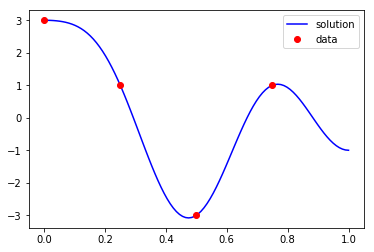

In [90]:
# Example Solution
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), \
           np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])  # Store one row at a time
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0, 1, 100)
y = sol[0] * np.cos(1 * np.pi * t) + sol[1] * np.cos(2 * np.pi * t) + \
    sol[2] * np.cos(3 * np.pi * t) + sol[3] * np.cos(4 * np.pi * t)
plt.plot(t, y, 'b', label='solution')
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best');

In [91]:
# Example solution
